“4. Training Models”
This chapter provides an in-depth look at the training of machine learning models, including linear regression, polynomial regression, and logistic regression. You will learn about the different optimization algorithms used for training, including gradient descent, stochastic gradient descent, and mini-batch gradient descent. You will also learn about regularization techniques, including ridge regression, lasso regression, and elastic net regression, and how to use early stopping to prevent overfitting.

What you will learn:

- How to train linear regression models using different optimization algorithms
- How to use regularization techniques to prevent overfitting
- How to use logistic regression for classification tasks and softmax regression for multi-class classification
- How to use cross-entropy as a cost function for classification tasks
- How to implement early stopping to prevent overfitting

# Training Machine Learning Models: Understanding How Models Learn

This chapter focuses on how machine learning models learn their parameters, using the linear regression model as a starting point. We'll explore two primary methods for training models:

## 1. Closed-Form Equation (Direct Computation)

*   **Concept:** This approach directly calculates the optimal model parameters that minimize the cost function using a mathematical formula. 
*   **Outcome:** It finds the *exact* parameters that best fit the model to the training data in a single step.

## 2. Iterative Optimization: Gradient Descent (GD)

*   **Concept:** An iterative algorithm that adjusts model parameters gradually to minimize the cost function.
*   **Process:**
    *   The algorithm starts with initial parameter values.
    *   It calculates the gradient (slope) of the cost function with respect to the parameters.
    *   It adjusts the parameters in the opposite direction of the gradient (moving towards a minimum of the cost function).
    *   This process is repeated until the parameters converge to a minimum.
*   **Gradient Descent Variants:**
    *   **Batch Gradient Descent (Batch GD):** Uses the entire training dataset to calculate gradients in each iteration.
    *   **Mini-Batch Gradient Descent (Mini-Batch GD):** Uses small, randomly chosen subsets of the training data (mini-batches) for calculating gradients.
    *   **Stochastic Gradient Descent (Stochastic GD):** Uses one randomly chosen data point at a time to calculate the gradient.
*   **Relevance:** These GD variants will be fundamental when we discuss Neural Networks in Part II.

## Polynomial Regression: A More Complex Model

*   **Overview:** Polynomial regression is a more complex model than linear regression that can fit non-linear relationships in datasets.
*   **Overfitting Risk:** Due to its complexity (more parameters), it's more prone to overfitting the training data.

## Addressing Overfitting

*   **Learning Curves:** We will use learning curves to help identify if the model is overfitting or not.
*   **Regularization Techniques:** We will discuss several techniques for reducing overfitting:
    *   These techniques are used to constrain the learning process, helping models generalize better.

**Summary**

This chapter lays the foundation for understanding how models are trained, focusing on linear regression as an introductory case. We will explore two main training methods, examine a more complex model (polynomial regression), and learn how to identify and mitigate overfitting issues. These concepts will be crucial as we progress to more complex models and neural networks in Part II.


## Linear Regression

Linear regression aims to model the relationship between a dependent variable (target) and one or more independent variables (features) using a linear equation.

### Simple Linear Regression

A simple linear regression model with one feature can be expressed as:

life_satisfaction = θ₀ + θ₁ × GDP_per_capita

where:

*   `life_satisfaction` is the predicted target variable.
*   `GDP_per_capita` is the feature.
*   `θ₀` is the bias term (y-intercept).
*   `θ₁` is the feature weight or slope.

### Multiple Linear Regression

A more general form of the linear regression equation with multiple features is:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow>
    <mover accent="true">
      <mi>y</mi>
      <mo>^</mo>
    </mover>
    <mo>=</mo>
    <msub>
      <mi>&#x3B8;</mi>
      <mn>0</mn>
    </msub>
    <mo>+</mo>
    <msub>
      <mi>&#x3B8;</mi>
      <mn>1</mn>
    </msub>
    <msub>
      <mi>x</mi>
      <mn>1</mn>
    </msub>
    <mo>+</mo>
    <msub>
      <mi>&#x3B8;</mi>
      <mn>2</mn>
    </msub>
    <msub>
      <mi>x</mi>
      <mn>2</mn>
    </msub>
    <mo>+</mo>
    <mo>&#x22EF;</mo>
    <mo>+</mo>
    <msub>
      <mi>&#x3B8;</mi>
      <mi>n</mi>
    </msub>
    <msub>
      <mi>x</mi>
      <mi>n</mi>
    </msub>
  </mrow>
</math>

In this equation:

*   `ŷ` is the predicted value.
*   `n` is the number of features.
*   `xᵢ` is the *i*th feature value.
*   `θⱼ` is the *j*th model parameter, including the bias term `θ₀` and the feature weights `θ₁`, `θ₂`, ..., `θₙ`.

### Vectorized Form of Linear Regression

The linear regression equation can be written much more concisely using a vectorized form:

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mover accent="true">
    <mi>y</mi>
    <mo>^</mo>
  </mover>
  <mo>=</mo>
  <msub>
    <mi>h</mi>
    <mi mathvariant="bold">&#x3B8;</mi>
  </msub>
  <mo>(</mo>
  <mi mathvariant="bold">x</mi>
  <mo>)</mo>
  <mo>=</mo>
  <mi mathvariant="bold">&#x3B8;</mi>
  <mo>&#xB7;</mo>
  <mi mathvariant="bold">x</mi>
</math>

In this equation:

*   `hθ` is the hypothesis function, using the model parameters `θ`.
*   `θ` is the model’s parameter vector, containing the bias term `θ₀` and the feature weights `θ₁` to `θₙ`.
*   `x` is the instance’s feature vector, containing `x₀` to `xₙ`, with `x₀` always equal to 1 (for the bias term).
*   `θ · x` is the dot product of the vectors `θ` and `x`, which is equal to `θ₀x₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ`.


We need to find the values Theta so that it minimizes the cost function(RMSE/MSE)

Equation 4-3. MSE cost function for a linear regression model

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow>
    <mtext>MSE</mtext>
    <mrow>
      <mo>(</mo>
      <mi mathvariant="bold">X</mi>
      <mo>,</mo>
      <msub>
        <mi>h</mi>
        <mi mathvariant="bold">&#x3B8;</mi>
      </msub>
      <mo>)</mo>
    </mrow>
    <mo>=</mo>
    <mstyle scriptlevel="0" displaystyle="true">
      <mfrac>
        <mn>1</mn>
        <mi>m</mi>
      </mfrac>
    </mstyle>
    <munderover>
      <mo>&#x2211;</mo>
      <mrow>
        <mi>i</mi>
        <mo>=</mo>
        <mn>1</mn>
      </mrow>
      <mi>m</mi>
    </munderover>
    <msup>
      <mrow>
        <mo>(</mo>
        <msup>
          <mi mathvariant="bold">&#x3B8;</mi>
          <mo>&#x22BA;</mo>
        </msup>
        <msup>
          <mi mathvariant="bold">x</mi>
          <mrow>
            <mo>(</mo>
            <mi>i</mi>
            <mo>)</mo>
          </mrow>
        </msup>
        <mo>-</mo>
        <msup>
          <mi>y</mi>
          <mrow>
            <mo>(</mo>
            <mi>i</mi>
            <mo>)</mo>
          </mrow>
        </msup>
        <mo>)</mo>
      </mrow>
      <mn>2</mn>
    </msup>
  </mrow>
</math>

### Normal Equation - Closed form Equation
<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow>
    <mover accent="true">
      <mi mathvariant="bold">&#x3B8;</mi>
      <mo>^</mo>
    </mover>
    <mo>=</mo>
    <msup>
      <mrow>
        <mo>(</mo>
        <msup>
          <mi mathvariant="bold">X</mi>
          <mo>&#x22BA;</mo>
        </msup>
        <mi mathvariant="bold">X</mi>
        <mo>)</mo>
      </mrow>
      <mrow>
        <mo>-</mo>
        <mn>1</mn>
      </mrow>
    </msup>
    <mo>&#xA0;</mo>
    <msup>
      <mi mathvariant="bold">X</mi>
      <mo>&#x22BA;</mo>
    </msup>
    <mo>&#xA0;</mo>
    <mi mathvariant="bold">y</mi>
  </mrow>
</math>

In this equation:

𝛉
 is the value of θ that minimizes the cost function.

y is the vector of target values containing y(1) to y(m).

In [1]:
import matplotlib.pyplot as plt
## Default parameters to make it pretier
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import numpy as np

np.random.seed(42)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

In [4]:
X.shape, y.shape

((100, 1), (100, 1))

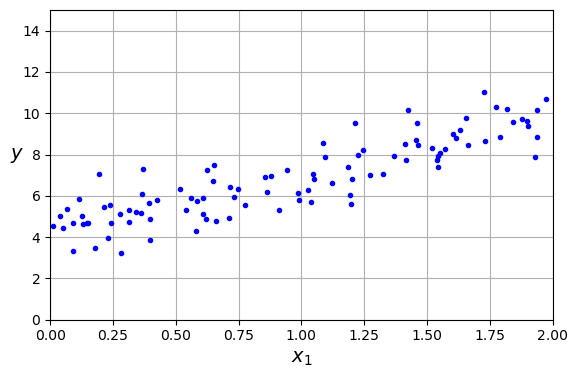

In [5]:
# extra code – generates and saves Figure 4–1

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

In [6]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [8]:
# Ex1
X_ = np.array([[1, 2], [3, 4]])
y_ = np.array([3, 5])

theta = np.linalg.inv((X_.T @ X_)) @ X_.T @ y_
theta = theta.reshape((2, 1))

res = X_.T @ theta

np.sum(np.sqrt((res.reshape((2,)) - y_)**2)/len(res)) #RMSE

1.5000000000000133

In [9]:
# Lets compute the theate

from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X, value=1)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [10]:
#The function that we used to generate the data is y = 4 + 3x1 + Gaussian noise. Let’s see what the equation found
theta_best

array([[4.21509616],
       [2.77011339]])

In [11]:
y_pred = X_b @ theta_best 

In [12]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_pred = X_new_b @ theta_best

[]

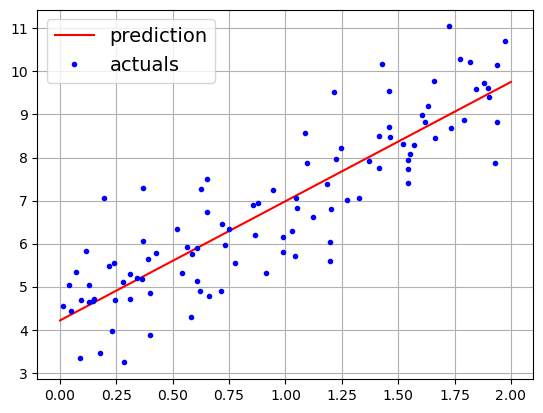

In [13]:
plt.plot(X_new, y_pred, 'r-', label='prediction')
plt.plot(X, y, 'b.', label='actuals')
plt.grid()
plt.legend()
plt.plot()

In [14]:
## You can directly implement the above with Linear Regression, The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”)
## linear_reg.intercept_, linear_reg.bias_ : to access intercept and bias

In [14]:
X_b

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516],
       [1.        , 0.04116899],
       [1.        , 1.9398197 ],
       [1.        , 1.66488528],
       [1.        , 0.42467822],
       [1.        , 0.36364993],
       [1.        , 0.36680902],
       [1.        , 0.60848449],
       [1.        , 1.04951286],
       [1.        , 0.86389004],
       [1.        , 0.58245828],
       [1.        , 1.22370579],
       [1.        , 0.27898772],
       [1.        , 0.5842893 ],
       [1.        , 0.73272369],
       [1.        , 0.91213997],
       [1.        , 1.57035192],
       [1.        , 0.39934756],
       [1.        , 1.02846888],
       [1.        , 1.18482914],
       [1.        , 0.09290083],
       [1.

In [15]:
np.linalg.lstsq(X_b, y, rcond=1e-6) # this function computes the pseudoinverse of X

## The pseudoinverse itself is computed using a standard matrix factorization technique called singular value decomposition (SVD) 

(array([[4.21509616],
        [2.77011339]]),
 array([80.6584564]),
 2,
 array([14.37020392,  4.11961067]))

### Learn About SVD(Singular Value Decomposition)

### Computational Complexity
The Normal equation computes the inverse of X⊺ X, which is an (n + 1) × (n + 1) matrix (where n is the number of features). The computational complexity of inverting such a matrix is typically about O(n2.4) to O(n3), depending on the implementation. In other words, if you double the number of features, you multiply the computation time by roughly 2^2.4 = 5.3 to 2^3 = 8.

The SVD approach used by Scikit-Learn’s LinearRegression class is about O(n2). If you double the number of features, you multiply the computation time by roughly 4.

Prediction Complexity is Same in Normal approach and SVD Approach

Its difficult to train model if the features are too long ex more than 100000, though its not a problem if you have enough memory

Now we will look at a very different way to train a linear regression model, which is better suited for cases where there are a large number of features or too many training instances to fit in memory.

## Gradient Decent

Gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog, and you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what gradient descent does: it measures the local gradient of the error function with regard to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

In practice, you start by filling θ with random values (this is called random initialization). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum

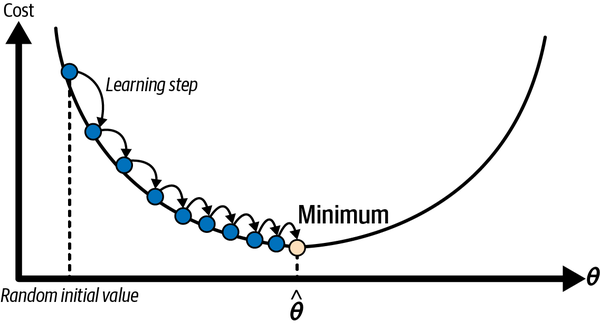

An important parameter in gradient descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time

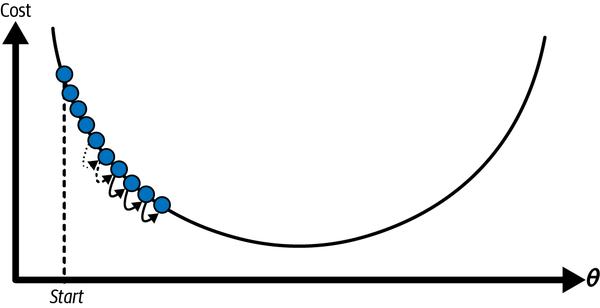

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution

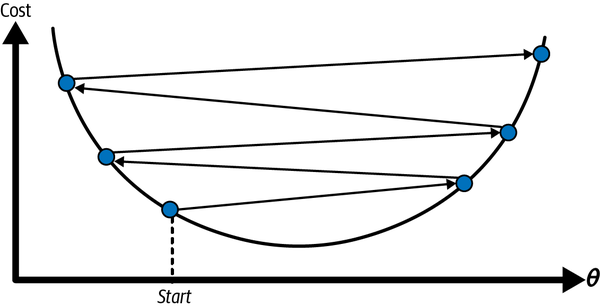

Additionally, not all cost functions look like nice, regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrain, making convergence to the minimum difficult. Figure 4-6 shows the two main challenges with gradient descent. If the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. If it starts on the right, then it will take a very long time to cross the plateau. And if you stop too early, you will never reach the global minimum.

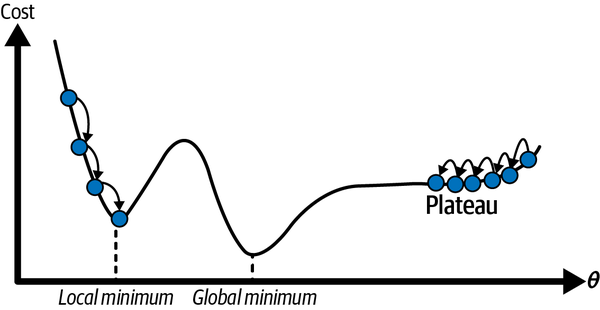

While the cost function has the shape of a bowl, it can be an elongated bowl if the features have very different scales. Figure 4-7 shows gradient descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).⁠3

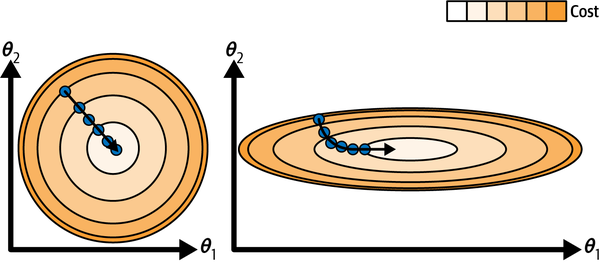

As you can see, on the left the gradient descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time.

Warning
When using gradient descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

## Batch Gradient Decent

To implement gradient descent, you need to compute the gradient of the cost function with regard to each model parameter θj. In other words, you need to calculate how much the cost function will change if you change θj just a little bit. This is called a partial derivative. It is like asking, “What is the slope of the mountain under my feet if I face east”? and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions). Equation 4-5 computes the partial derivative of the MSE with regard to parameter θj, noted ∂ MSE(θ) / ∂θj.

Equation 4-5. Partial derivatives of the cost function

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow>
    <mstyle scriptlevel="0" displaystyle="true">
      <mfrac>
        <mi>&#x2202;</mi>
        <mrow>
          <mi>&#x2202;</mi>
          <msub>
            <mi>&#x3B8;</mi>
            <mi>j</mi>
          </msub>
        </mrow>
      </mfrac>
    </mstyle>
    <mtext>MSE</mtext>
    <mrow>
      <mo>(</mo>
      <mi mathvariant="bold">&#x3B8;</mi>
      <mo>)</mo>
    </mrow>
    <mo>=</mo>
    <mstyle scriptlevel="0" displaystyle="true">
      <mfrac>
        <mn>2</mn>
        <mi>m</mi>
      </mfrac>
    </mstyle>
    <munderover>
      <mo>&#x2211;</mo>
      <mrow>
        <mi>i</mi>
        <mo>=</mo>
        <mn>1</mn>
      </mrow>
      <mi>m</mi>
    </munderover>
    <mrow>
      <mo>(</mo>
      <msup>
        <mi mathvariant="bold">&#x3B8;</mi>
        <mo>&#x22BA;</mo>
      </msup>
      <msup>
        <mi mathvariant="bold">x</mi>
        <mrow>
          <mo>(</mo>
          <mi>i</mi>
          <mo>)</mo>
        </mrow>
      </msup>
      <mo>-</mo>
      <msup>
        <mi>y</mi>
        <mrow>
          <mo>(</mo>
          <mi>i</mi>
          <mo>)</mo>
        </mrow>
      </msup>
      <mo>)</mo>
    </mrow>
    <mspace width="0.166667em"></mspace>
    <msubsup>
      <mi>x</mi>
      <mi>j</mi>
      <mrow>
        <mo>(</mo>
        <mi>i</mi>
        <mo>)</mo>
      </mrow>
    </msubsup>
  </mrow>
</math>

instead of computing these Partial Derivaties for individual parameters, you can compute as whole

Equation 4-6. Gradient vector of the cost function

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow>
    <msub>
      <mi>&#x2207;</mi>
      <mi mathvariant="bold">&#x3B8;</mi>
    </msub>
    <mspace width="0.166667em"></mspace>
    <mtext>MSE</mtext>
    <mrow>
      <mo>(</mo>
      <mi mathvariant="bold">&#x3B8;</mi>
      <mo>)</mo>
    </mrow>
    <mo>=</mo>
    <mfenced open="" close=")">
      <mtable>
        <mtr>
          <mtd>
            <mrow>
              <mfrac>
                <mi>&#x2202;</mi>
                <mrow>
                  <mi>&#x2202;</mi>
                  <msub>
                    <mi>&#x3B8;</mi>
                    <mn>0</mn>
                  </msub>
                </mrow>
              </mfrac>
              <mtext>MSE</mtext>
              <mrow>
                <mo>(</mo>
                <mi mathvariant="bold">&#x3B8;</mi>
                <mo>)</mo>
              </mrow>
            </mrow>
          </mtd>
        </mtr>
        <mtr>
          <mtd>
            <mrow>
              <mfrac>
                <mi>&#x2202;</mi>
                <mrow>
                  <mi>&#x2202;</mi>
                  <msub>
                    <mi>&#x3B8;</mi>
                    <mn>1</mn>
                  </msub>
                </mrow>
              </mfrac>
              <mtext>MSE</mtext>
              <mrow>
                <mo>(</mo>
                <mi mathvariant="bold">&#x3B8;</mi>
                <mo>)</mo>
              </mrow>
            </mrow>
          </mtd>
        </mtr>
        <mtr>
          <mtd>
            <mo>&#x22EE;</mo>
          </mtd>
        </mtr>
        <mtr>
          <mtd>
            <mrow>
              <mfrac>
                <mi>&#x2202;</mi>
                <mrow>
                  <mi>&#x2202;</mi>
                  <msub>
                    <mi>&#x3B8;</mi>
                    <mi>n</mi>
                  </msub>
                </mrow>
              </mfrac>
              <mtext>MSE</mtext>
              <mrow>
                <mo>(</mo>
                <mi mathvariant="bold">&#x3B8;</mi>
                <mo>)</mo>
              </mrow>
            </mrow>
          </mtd>
        </mtr>
      </mtable>
    </mfenced>
    <mo>=</mo>
    <mstyle scriptlevel="0" displaystyle="true">
      <mfrac>
        <mn>2</mn>
        <mi>m</mi>
      </mfrac>
    </mstyle>
    <msup>
      <mi mathvariant="bold">X</mi>
      <mo>&#x22BA;</mo>
    </msup>
    <mrow>
      <mo>(</mo>
      <mi mathvariant="bold">X</mi>
      <mi mathvariant="bold">&#x3B8;</mi>
      <mo>-</mo>
      <mi mathvariant="bold">y</mi>
      <mo>)</mo>
    </mrow>
  </mrow>
</math>

Warning:
Notice that this formula involves calculations over the full training set X, at each gradient descent step! This is why the algorithm is called batch gradient descent: it uses the whole batch of training data at every step (actually, full gradient descent would probably be a better name). As a result, it is terribly slow on very large training sets (we will look at some much faster gradient descent algorithms shortly). However, gradient descent scales well with the number of features; training a linear regression model when there are hundreds of thousands of features is much faster using gradient descent than using the Normal equation or SVD decomposition.

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting ∇θMSE(θ) from θ. This is where the learning rate η comes into play:⁠4 multiply the gradient vector by η to determine the size of the downhill step

Equation 4-7. Gradient descent step

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <msup>
    <mi mathvariant="bold">&#x3B8;</mi>
    <mrow>
      <mo>(</mo>
      <mtext>next step</mtext>
      <mo>)</mo>
    </mrow>
  </msup>
  <mo>=</mo>
  <mi mathvariant="bold">&#x3B8;</mi>
  <mo>-</mo>
  <mi>&#x3B7;</mi>
  <msub>
    <mo>&#x2207;</mo>
    <mi mathvariant="bold">&#x3B8;</mi>
  </msub>
  <mo>&#x200A;</mo>
  <mtext>MSE</mtext>
  <mo>(</mo>
  <mi mathvariant="bold">&#x3B8;</mi>
  <mo>)</mo>
</math>

In [16]:
## Example code

eta = 0.01
epochs = 1000
m = len(X_b)

theta_c = np.random.rand(2, 1)

for epoc in range(epochs):
    gradient = 2 / m * (X_b.T @ (X_b@theta_c - y))
    theta_c = theta_c - eta * gradient
print(theta_c) ## here you go we got the Model Weights in easy steps

[[4.18850002]
 [2.79359633]]


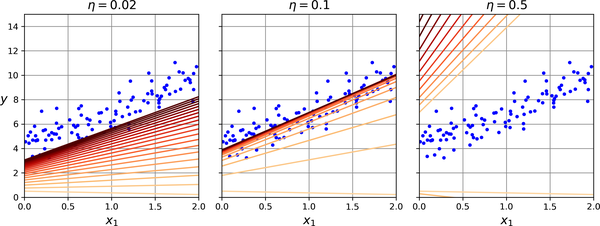

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few epochs, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

To find a good learning rate, you can use grid search (see Chapter 2). However, you may want to limit the number of epochs so that grid search can eliminate models that take too long to converge.

You may wonder how to set the number of epochs. If it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of epochs but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when gradient descent has (almost) reached the minimum.

## Stochastic Gradient Descent

The main problem with batch gradient descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, stochastic gradient descent picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously, working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than batch gradient descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down (see Figure 4-9). Once the algorithm stops, the final parameter values will be good, but not optimal.

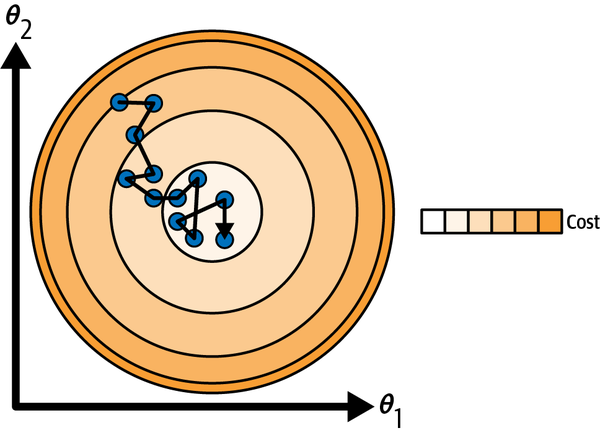

When the cost function is very irregular (as in Figure 4-6), this can actually help the algorithm jump out of local minima, so stochastic gradient descent has a better chance of finding the global minimum than batch gradient descent does.

Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to simulated annealing, an algorithm inspired by the process in metallurgy of annealing, where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

In [17]:
X_b[0:1]

array([[1.        , 0.74908024]])

In [18]:
## Implement Stochastic Gradent Decent

epochs = 1000
t0, t1 = 5, 50
theta = np.random.rand(2, 1)
def learning_schedule(t):
    return t0 / (t1 + t)

for epoch in range(epochs):
    for m in range(len(X_b)):
        random_index = np.random.randint(0, len(X_b))
        X_i = X_b[random_index: random_index+1]
        y_i = y[random_index: random_index+1]
        gradient = 2 * X_i.T @ (X_i @ theta - y_i) # do not divide /m for Stochastic gradient decent
        eta = learning_schedule(epoch * len(X_b) + m)
        theta = theta - eta * gradient
print(theta) # here you go, we have achieved the same parameters as Normal-Method and Batch Gradient Decent

[[4.20393987]
 [2.76108034]]


Note that since instances are picked randomly, some instances may be picked several times per epoch, while others may not be picked at all. If you want to be sure that the algorithm goes through every instance at each epoch, another approach is to shuffle the training set (making sure to shuffle the input features and the labels jointly), then go through it instance by instance, then shuffle it again, and so on. However, this approach is more complex, and it generally does not improve the result.

Figure 4-10. The first 20 steps of stochastic gradient descent

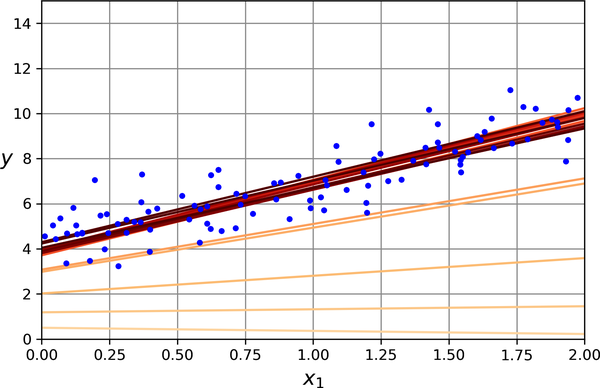

Warning:
When using stochastic gradient descent, the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average. A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not shuffle the instances—for example, if the instances are sorted by label—then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.


In [19]:
## Example using SGD Regressior - It defaults to using MSE as cost function

## The following code runs for maximum 1,000 epochs (max_iter) or until the loss drops by less than 10^–5 (tol) during 100 epochs (n_iter_no_change). 
## It starts with a learning rate of 0.01 (eta0), 
## using the default learning schedule (different from the one we used). Lastly, it does not use any regularization

from sklearn.linear_model import SGDRegressor

sgd_regg = SGDRegressor(max_iter=1000, tol=1e-5, eta0=0.01, penalty=None, n_iter_no_change=100, random_state=42)

sgd_regg.fit(X_b, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [20]:
sgd_regg.intercept_, sgd_regg.coef_

(array([2.10780402]), array([2.10780402, 2.76967366]))

# Mini-Batch Gradient Descent: A Closer Look

Mini-batch gradient descent is a powerful optimization algorithm used in machine learning to train models. It's a middle ground between two other common methods, Batch Gradient Descent and Stochastic Gradient Descent, combining some of the best aspects of both.

## How it Works

*   **Mini-batches:** Instead of using the entire training dataset (as in Batch GD) or just a single data point (as in Stochastic GD), mini-batch GD works with small, randomly selected groups of data points called *mini-batches*.
*   **Gradient Calculation:** The algorithm computes the gradient of the loss function (a measure of how well the model is performing) with respect to the model's parameters based on each mini-batch.
*   **Parameter Update:** The model's parameters are then updated using this gradient information, making a step towards minimizing the loss function.
*   **Iteration:** This process is repeated for many iterations, with different mini-batches being selected in each iteration, until the model converges (reaches a point where it doesn't improve much).

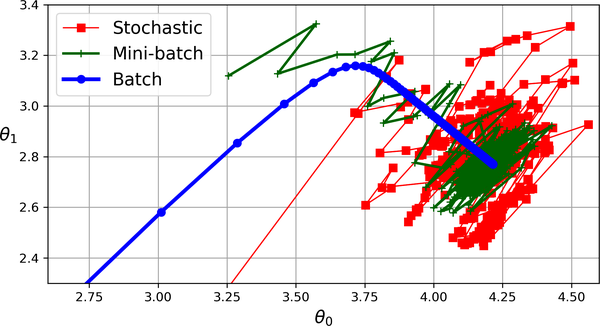

## Analogy

Imagine you're exploring a valley to find the lowest point. Mini-batch GD is like taking a series of short walks, with each walk based on a small map of a nearby area. Each map represents a mini-batch. This allows you to explore the valley effectively without being overwhelmed by the entire landscape or getting lost in small details.

## Advantages

*   **Speed:** It's significantly faster than Batch GD, especially with large datasets, because it doesn't need to calculate gradients over the whole dataset for each step.
*   **Smoothness:** It is more stable than Stochastic GD because the gradients are averaged over multiple data points, reducing the noise and oscillations.
*   **Hardware Friendly:** Mini-batch GD is well-suited for parallel processing, making it highly efficient on GPUs and modern hardware.
*   **Scalability:** It can handle larger datasets effectively while maintaining a reasonable training time.
*   **Good Convergence:** It often converges to a good solution faster than other methods, achieving a balance between accuracy and speed.

## Key Considerations

*   **Mini-batch Size:** The size of the mini-batch is a hyperparameter that needs to be tuned. A good size often falls between 32 and 512, but it depends on the dataset and problem.
*   **Local Minima:** While mini-batch GD is less likely to get stuck in local minima than Batch GD, it's not guaranteed to find the global minimum, especially with non-convex loss functions.

# Algorithm Comparison

Here's how mini-batch GD compares to other gradient descent methods in a table:

| Algorithm        | Large m | Out-of-core support | Large n | Hyperparams | Scaling Required | Scikit-Learn    |
|-----------------|---------|--------------------|---------|-------------|------------------|-----------------|
| Normal equation  | Fast    | No                 | Slow    | 0           | No               | N/A             |
| SVD             | Fast    | No                 | Slow    | 0           | No               | `LinearRegression`|
| Batch GD        | Slow    | No                 | Fast    | 2           | Yes              | N/A             |
| Stochastic GD   | Fast    | Yes                | Fast    | ≥2          | Yes              | `SGDRegressor`  |
| Mini-batch GD   | Fast    | Yes                | Fast    | ≥2          | Yes              | N/A             |

*   **Large m:** How well does the algorithm handle many training examples?
*   **Out-of-core support:** Can the algorithm handle more data than RAM can hold?
*   **Large n:** How well does the algorithm handle many features?
*   **Hyperparams:** How many tuning parameters does the algorithm require?
*   **Scaling Required:** Do we have to rescale the data first to ensure the algorithm works?
*   **Scikit-Learn:** Which algorithm corresponds to what function in Scikit-learn?

## In Summary

Mini-batch gradient descent is a versatile and effective optimization method that has become the go-to choice in many machine learning applications, combining the speed of stochastic gradient descent with the stability of batch gradient descent. It also offers strong performance in terms of scalability and hardware utilization.

## Polynomial Regression

What if your data is more complex than a straight line? Surprisingly, you can use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called polynomial regression.

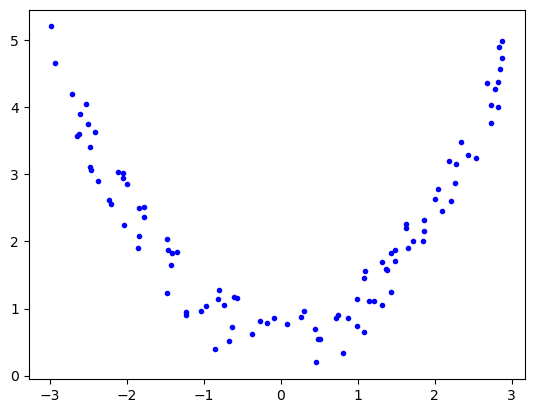

In [30]:
x = 6 * np.random.rand(100, 1) - 3
y = 0.5 * x ** 2 + np.random.rand(100, 1)
plt.plot(x, y, 'b.') ## this cannot be fit in a stright line, we need a more complex model

In [32]:
## Lets transform the training set using Polynomial Feature degree 2

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly.fit_transform(x)

X_poly[0] # first feature is original, second feature is the square of the first

array([-2.46887423,  6.09533997])

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([0.61920385]), array([[0.00138593, 0.47384439]]))

In [34]:
lin_reg.intercept_.shape

(1,)

In [35]:
(lin_reg.coef_ @ X_poly.T)

array([[2.88482099e+00, 3.16590331e-01, 9.89353337e-02, 2.66940638e+00,
        2.56468127e-01, 3.53904538e+00, 1.89924737e+00, 2.47581452e-01,
        1.89831410e+00, 1.25662107e+00, 1.25857611e+00, 3.31202305e+00,
        3.83011404e+00, 8.82010179e-01, 3.52506957e+00, 3.92211142e+00,
        3.47624346e-01, 3.24651474e-02, 9.00106258e-01, 2.08163054e+00,
        3.78732421e+00, 3.84393616e+00, 5.04667990e-01, 5.57133038e-01,
        2.12350473e+00, 1.64744342e+00, 1.97491095e+00, 2.60689095e+00,
        3.91951345e+00, 2.91538386e+00, 2.70839129e-03, 9.42245713e-01,
        1.50682984e-02, 7.23759656e-01, 3.21466645e+00, 1.90321830e-01,
        1.48638401e+00, 4.18527783e-02, 5.57616573e-01, 1.52170757e-01,
        1.49576220e+00, 1.61876663e+00, 4.21983863e+00, 7.00389913e-01,
        1.03760034e+00, 3.78398666e+00, 1.04325203e+00, 7.12533135e-01,
        1.98136279e+00, 2.64780755e-01, 2.27013129e+00, 1.21992030e-01,
        4.07538590e+00, 1.40058562e+00, 3.67999364e+00, 3.489482

In [36]:
lin_reg.intercept_ + (lin_reg.coef_ @ X_poly.T).reshape(100,)

array([3.50402484, 0.93579418, 0.71813918, 3.28861023, 0.87567197,
       4.15824923, 2.51845122, 0.8667853 , 2.51751794, 1.87582491,
       1.87777995, 3.93122689, 4.44931788, 1.50121403, 4.14427342,
       4.54131527, 0.96682819, 0.65166899, 1.5193101 , 2.70083438,
       4.40652805, 4.46314   , 1.12387184, 1.17633688, 2.74270857,
       2.26664727, 2.5941148 , 3.2260948 , 4.5387173 , 3.5345877 ,
       0.62191224, 1.56144956, 0.63427214, 1.3429635 , 3.8338703 ,
       0.80952568, 2.10558786, 0.66105662, 1.17682042, 0.7713746 ,
       2.11496604, 2.23797048, 4.83904247, 1.31959376, 1.65680418,
       4.40319051, 1.66245587, 1.33173698, 2.60056664, 0.8839846 ,
       2.88933514, 0.74119588, 4.69458975, 2.01978947, 4.29919749,
       4.1086862 , 2.25190227, 1.43912713, 0.79758473, 0.92694491,
       2.60220085, 1.44737401, 0.73246806, 3.53126965, 2.93537837,
       2.97213243, 0.68362256, 2.93664177, 0.98464187, 1.58626275,
       4.03488984, 1.6612024 , 0.92303507, 0.83716884, 3.38627

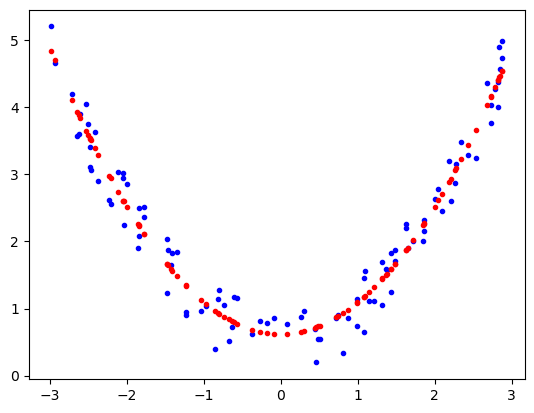

In [39]:
plt.plot(x, y, 'b.')
plt.plot(x, lin_reg.intercept_ + (lin_reg.coef_ @ X_poly.T).reshape(100,), 'r.')

In [38]:
lin_reg.intercept_, lin_reg.coef_

(array([0.61920385]), array([[0.00138593, 0.47384439]]))

Not bad: the model estimates $\hat{y} = 0.56x_1^2 + 0.93x_1 + 1.78$ when in fact the original function was $y = 0.5x_1^2 + 1.0x_1 + 2.0 + \text{Gaussian noise}$.

Note that when there are multiple features, polynomial regression is capable of finding relationships between features, which is something a plain linear regression model cannot do. This is made possible by the fact that `PolynomialFeatures` also adds all combinations of features up to the given degree. For example, if there were two features `a` and `b`, `PolynomialFeatures` with `degree=3` would not only add the features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations $ab$, $a^2b$, and $ab^2$.

**Warning**

`PolynomialFeatures(degree=d)` transforms an array containing *n* features into an array containing (n + d)! / d!n! features, where n! is the factorial of n, equal to 1 × 2 × 3 × ⋯ × n. Beware of the combinatorial explosion of the number of features!

In [41]:
## test

xt = np.arange(6).reshape((3, 2))
p = PolynomialFeatures(2)
p.fit_transform(xt) # 1, a, b, a^2, ab, b^2

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

## Constructing Polynomial Features (Degree 3, 2 Features)

Let's explore how `PolynomialFeatures` with `degree=3` transforms two features, `a` and `b`, into a set of polynomial features.

**Goal:** The goal is to generate all possible combinations of features `a` and `b`, where the sum of the exponents for each term is no more than 3.

**Step-by-Step Construction:**

1.  **Degree 0 (Constant Term):**
    *   We always start with a constant term (a term that doesn't depend on any features).
    *   Term: `1`

2.  **Degree 1 (Linear Terms):**
    *   These are the individual features themselves raised to the power 1.
    *   Terms: `a`, `b`

3.  **Degree 2 (Quadratic Terms):**
    *   These are terms where the sum of the exponents is 2.
    *   Terms: `a^2`, `ab`, `b^2`

4.  **Degree 3 (Cubic Terms):**
    *   These are terms where the sum of the exponents is 3.
    *   Terms: `a^3`, `a^2b`, `ab^2`, `b^3`

**Putting it All Together**

The complete vector of polynomial features is: [1, a, b, a^2, ab, b^2, a^3, a^2b, ab^2, b^3]


**General Formula**

If you want to understand why, we have these terms specifically, the more general formula looks like this.

$x_1$ is feature $a$ and $x_2$ is feature $b$. Our polynomial is of degree d=3.
the general term is $\prod_{i=1}^n x_i^{a_i}$ where $\sum_i^n a_i <= d$

in our example the above is $\prod_{i=1}^2 x_i^{a_i}$ where $a_1 + a_2 <= 3$

* $a_1=0, a_2=0$ => 1
* $a_1=1, a_2=0$ => a
* $a_1=0, a_2=1$ => b
* $a_1=2, a_2=0$ => $a^2$
* $a_1=1, a_2=1$ => $ab$
* $a_1=0, a_2=2$ => $b^2$
* $a_1=3, a_2=0$ => $a^3$
* $a_1=2, a_2=1$ => $a^2b$
* $a_1=1, a_2=2$ => $ab^2$
* $a_1=0, a_2=3$ => $b^3$

**Ordered By Degree**

Here's the same formula ordered by the *total degree* of each term:

*   **Degree 0:** `1`
*   **Degree 1:** `a`, `b`
*   **Degree 2:** `a^2`, `ab`, `b^2`
*   **Degree 3:** `a^3`, `a^2b`, `ab^2`, `b^3`

**Number of Features**

The number of features `f` for a given degree `d` and number of features `n` is: f = (n + d)! / (d! * n!)


For our case `n=2` and `d=3`, so it would be `(2 + 3)! / (3! * 2!) = 5!/(3! * 2!) = 120/(6 * 2) = 10`.

**Key Takeaway**

`PolynomialFeatures` adds not only squared or cubed versions of original features but also combinations of features, enabling polynomial regression to capture complex relationships.

**Example**

If you have features `a = 2` and `b = 3`, the transformed polynomial feature vector will be: [1, 2, 3, 4, 6, 9, 8, 12, 18, 27]


For linear regression, the resulting linear model would be:

$w_0 + w_1*1 + w_2*2 + w_3*3 + w_4*4 + w_5*6 + w_6*9 + w_7*8 + w_8*12 + w_9*18 + w_{10}*27$

Where $w_i$ are the weights, and the output would be the prediction.

## Learning Curves

When you use polynomial regression with a very high degree, you can often fit the training data much better than with a simple linear model. For instance, Figure 4-14 illustrates a 300-degree polynomial model applied to some training data, and it compares this result with a linear model and a quadratic (2nd-degree polynomial) model. Notice how the 300-degree polynomial model twists and turns to be as close as possible to each training data point.

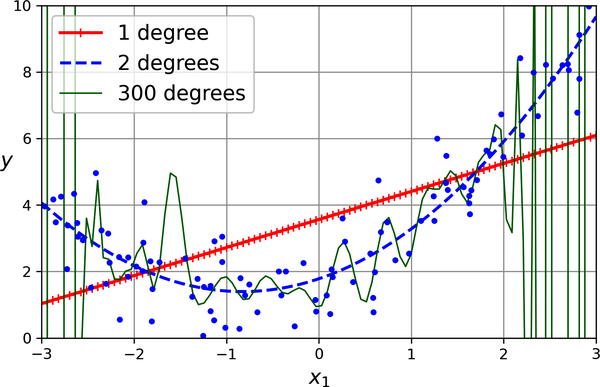

This high-degree polynomial regression model is severely *overfitting* the training data, while the linear model is *underfitting* it. In this example, the quadratic model generalizes best, which makes sense as the data was generated using a quadratic model. But in real-world scenarios, you typically don't know the true function that generated the data, so how can you determine the ideal complexity of your model? How can you know when your model is overfitting or underfitting?

In Chapter 2, we discussed using cross-validation to assess a model's generalization performance. If a model performs excellently on the training data but performs poorly on cross-validation, then it is likely overfitting. Conversely, if it performs poorly on both, then the model is likely underfitting. This is one way to tell if your model is too simple or too complex.

Another effective way is to look at *learning curves*. Learning curves are plots showing the model's training error and validation error as a function of the training iteration, or the training set size. To create these, evaluate the model at regular intervals during training on both the training set and a separate validation set, and then plot the errors. If the model supports incremental learning (i.e., if it has `partial_fit()` or `warm_start`), you can train the model incrementally as you move across different set sizes. Otherwise, train a new model each time with gradually increasing subset sizes.

Scikit-Learn offers the `learning_curve()` function to help with this. It trains and evaluates your model using cross-validation. By default, it trains the model on growing subsets of the training set. However, if your model supports incremental learning, you can set `exploit_incremental_learning=True` when calling `learning_curve()` for more efficient training. The function returns:

*   The training set sizes at which the model was evaluated
*   The training and validation scores for each size and cross-validation fold.

Let's use this to examine the learning curves of a plain linear regression model (Figure 4-15 will illustrate this):

**Example of Overfitting vs Underfitting**

*   **Overfitting:**
    *   Imagine a student who memorizes all the answers to a practice exam. They get perfect scores on practice tests but perform poorly on real exams because they haven't learned the underlying concepts.
    *   In the context of models, an overfitting model performs very well on the training data (low training error) but poorly on unseen data (high validation error).
*   **Underfitting:**
    *   Consider a student who does not study at all. They perform poorly on both practice tests and real exams because they lack knowledge and understanding.
    *   An underfitting model performs poorly on both the training and unseen data. This indicates the model is too simple to capture the patterns.

**Learning Curves Example (Conceptual)**

Let's imagine a plot showing these results.

*   **X-axis:** The number of training examples used
*   **Y-axis:** The error of our model.

We might see something like this:

*   **Underfitting Model:**
    *   Both training error and validation error are high, and they stay relatively flat or close together as more data is added. This suggests that adding more training data may not help much.
*   **Overfitting Model:**
    *   The training error is very low, but the validation error is high, and there is a big gap between the two. As we add more data, the training error rises and the validation error falls and converges with the training error, which is something we want to achieve.
*   **Good Model:**
     *   Both the training and validation error will be low, and there is not much of a gap between both. As more training examples are added, the validation error converges with the training error at the lowest error we are going to achieve with that model.

In practice, `learning_curve()` from Scikit-Learn will handle the mechanics of training and validation, and create these curves for you.

In [43]:
X.shape, y.shape

((100, 1), (100, 1))

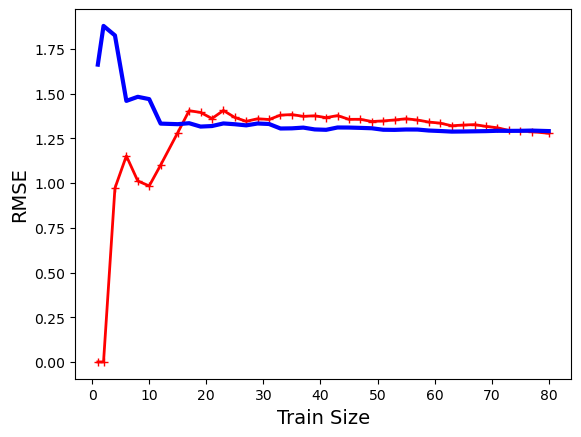

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_errors = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error") # for each iteraction the train size increases, it performs CV within the train Sizes
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_errors.mean(axis=1)

# for ex 1000 samples cv=5 and train sizes 0.1, 0.5, 0.8 (100, 500, 800) it will perform 5 CV for each train size and then take the mean of the RMSE

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel('Train Size')
plt.ylabel('RMSE')
plt.show()

In [53]:
train_sizes

array([ 1,  2,  4,  6,  8, 10, 12, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 80])

In [52]:
np.linspace(0.01, 1.0, 40)

array([0.01      , 0.03538462, 0.06076923, 0.08615385, 0.11153846,
       0.13692308, 0.16230769, 0.18769231, 0.21307692, 0.23846154,
       0.26384615, 0.28923077, 0.31461538, 0.34      , 0.36538462,
       0.39076923, 0.41615385, 0.44153846, 0.46692308, 0.49230769,
       0.51769231, 0.54307692, 0.56846154, 0.59384615, 0.61923077,
       0.64461538, 0.67      , 0.69538462, 0.72076923, 0.74615385,
       0.77153846, 0.79692308, 0.82230769, 0.84769231, 0.87307692,
       0.89846154, 0.92384615, 0.94923077, 0.97461538, 1.        ])

In [64]:
train_scores.shape, test_scores.shape

((40, 5), (40, 5))

## Simplified Summary: Learning Curves and Model Evaluation

This summary provides a simple overview of the key ideas and the Python code used to generate learning curves.

**1. What are Learning Curves?**

*   Learning curves show how a model's performance changes as we give it more training data.
*   They plot both the *training error* (how well the model fits the data it was trained on) and the *validation error* (how well the model generalizes to unseen data).
*   These curves help us understand if our model is:
    *   **Underfitting:**  Model is too simple (high error on both training and validation sets, and they do not converge when we increase training data).
    *   **Overfitting:** Model is too complex (low training error, but high validation error, a gap between training and validation error is observed).
    *   **Just Right:** Model generalizes well (low error on both training and validation sets, and they converge).

**2. Key Code Functionality (using `learning_curve`)**

*   **Objective:** The Python code uses `learning_curve` to create learning curves for a given model.
*   **Action:** It does the following:
    1.  **Model Initialization:** Creates a Linear Regression model.
    2. **Incremental Training:** Repeatedly trains the model, with each step using a larger *portion* of the training data. Each training uses a *new* model.
    3.  **Evaluation:** Each model is then evaluated with the training data, and in unseen validation data using a technique called cross-validation.
    4.  **Results:** Collects and organizes the performance scores (error rates) for each training size.
    5.  **Visualization:** Finally, the code plots the performance (i.e. errors) to make a line plot (the "learning curve").
*  **Key Parameters:**
    * `train_sizes`: array that defines the proportions of the full training data that will be used for training, going from a small fraction of the training data to the whole data.
    * `cv`: number of splits for the cross validation.
    * `scoring`: metric that we will use to evaluate the model
*   **Output:** The plot shows how training and validation error change with increasing training data.

**3. What the Code Does Step-by-Step**

1.  **Imports tools:** Imports libraries for model training and plotting.
2.  **Defines training data:** Makes sure we have the training features `X` and their respective labels `y`.
3.  **Generates results:** Uses `learning_curve` to train models with increasing amounts of data and to evaluate them, returning errors for each training set size for both training and validation.
4.  **Converts results:** Transforms the scores into error values, and computes the mean score for each training set size.
5.  **Plots the Learning Curve:** Draws two lines: one showing how training error changes with more data, and another showing how the validation error changes with more data.
6.  **Display plot:** The learning curve is then visualized for us to draw conclusions about our model.

**4. Why are Learning Curves Useful?**

*   They help you decide if a model is too complex or too simple.
*   They show if adding more training data will likely improve the model.
*   They guide you in model selection and data needs.

**In Simple Terms:**

The code creates a visual representation of a model's learning progress as it's exposed to more data, helping you fine-tune your model for best performance.


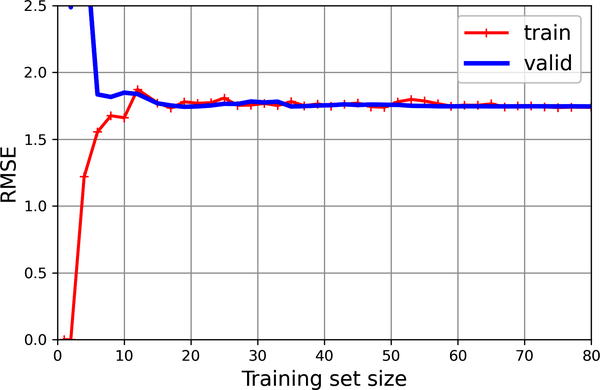

## Summary: Learning Curves and Underfitting

This text explains how to identify an underfitting model by analyzing its learning curves. Here's a breakdown:

**Understanding the Learning Curves of an Underfitting Model**

*   **Training Error Curve:**
    *   Starts at zero: When the training set is very small (e.g., one or two data points), the model can fit it perfectly, leading to zero error.
    *   Increases and plateaus: As more data points are added, it becomes impossible to fit the training data perfectly due to noise and because the underlying data is not linear. The training error increases and then reaches a plateau. This is because the model is too simple to capture the data, and it has a limit to how low it can get its error to.
    *   Plateau indicates: Adding more instances to the training set has little effect on the average training error after this point because the model cannot learn more.

*   **Validation Error Curve:**
    *   Starts high: When the model is trained on very few data points, it cannot generalize well to unseen data; hence the initially large error.
    *   Decreases and plateaus: As the model is shown more training data, it learns, and so the validation error decreases. However, because the model is a linear function and data is not, the error does not get to a very low point.
     *   Plateau indicates: After a point adding more data does not help the model generalize.

**Characteristics of Underfitting:**

*   **Plateau:** Both the training and validation error curves reach a plateau and adding more data does not help.
*   **High Error:** Both the training and validation errors level out at a relatively high level.
*   **Close Curves:** The training and validation curves are close to each other (although a small gap can be seen), and do not converge to low values of errors.
*  **Simplicity:** The model is too simple to adequately capture the underlying patterns in the data. The model isn't complex enough to fit even the training data well.

**In Simple Terms:**

Underfitting happens when your model is not complex enough to learn from your data.  Both the training and validation sets will show high error rates, and adding more training data won't make the model much better. The model is not complex enough to even fit the training set, and therefore it will have a bad performance in unseen data.

### Learning Curve for 10 degree polynomial

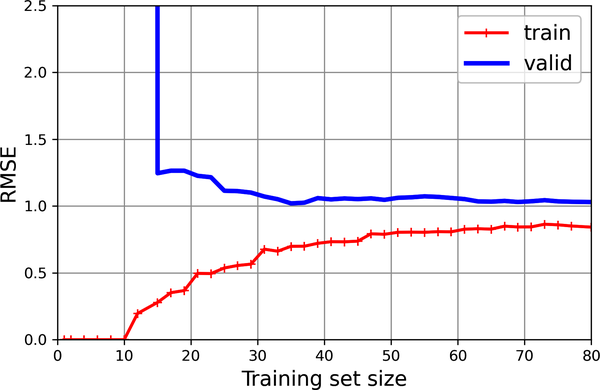


**These learning curves look a bit like the previous ones, but there are two very important differences:**

*   The error on the training data is much lower than before.

*   There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.

**One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.**

## Bias/Variance Tradeoff

A key theoretical result in statistics and machine learning is that a model's generalization error can be broken down into three distinct components:

**1. Bias:**

*   **Cause:** This error stems from incorrect assumptions made by the model, such as assuming a linear relationship when the actual relationship is quadratic or more complex.
*   **Impact:** A model with high bias tends to *underfit* the training data. It is too simple to capture the true patterns.

**2. Variance:**

*   **Cause:** This error is due to a model's excessive sensitivity to minor fluctuations or noise in the training data. The model is too flexible and tries to fit the training data perfectly, capturing also the noise.
*   **Impact:** Models with many degrees of freedom (e.g., high-degree polynomial models) are prone to high variance and are likely to *overfit* the training data.

**3. Irreducible Error:**

*   **Cause:** This error is inherent to the data itself. It arises from the noisiness or randomness present in the data.
*   **Solution:** The only way to reduce this error is to clean up the data, for example:
    *   Fix data sources (e.g., repair broken sensors).
    *   Detect and remove outliers.

**The Tradeoff:**

*   **Increasing Model Complexity:** Typically, increasing a model's complexity (making it more flexible) will:
    *   Increase its variance (more prone to overfitting).
    *   Reduce its bias (better fit to the training data).
*   **Reducing Model Complexity:** Conversely, reducing a model's complexity (making it simpler) will:
    *   Increase its bias (more prone to underfitting).
    *   Reduce its variance (less prone to overfitting).

This is why it's called a **tradeoff**; you have to find a balance between bias and variance to achieve optimal generalization performance. You need to balance the model's flexibility with it's ability to generalize to unseen data, not fitting to training set's noise.

## Regularized Linear Models: Taming Overfitting

As we've seen, a common way to deal with overfitting (when a model learns the training data too well, including its noise) is to *regularize* it. This basically means adding constraints to the model, making it harder to overfit. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

For linear models, we usually achieve regularization by constraining the model's weights (the parameters that determine the line's position and slope). We'll discuss three types: Ridge Regression, Lasso Regression, and Elastic Net.

### Ridge Regression

Ridge Regression (also known as Tikhonov regularization) is a regularized version of linear regression.

**Key Idea:** It adds a regularization term to the Mean Squared Error (MSE) cost function. This term is designed to make the model not only fit the data but also keep the weights as small as possible.

**Why is this good?** Large weights can make a model very sensitive to small changes in the data, making it overfit. By keeping the weights small, we limit the model's flexibility, making it generalize better to unseen data.

**Regularization Term:**

The mathematical term that is added to the MSE is:

   `α/m * Σ (θᵢ²)`
  *  Where `Σ (θᵢ²)` is the sum of squares of all feature weights from θ₁ to θₙ. `i` ranges from 1 to n and n is number of features.
   *   `α` (alpha) is the hyperparameter that controls how much we want to regularize the model.  It's a value you set before training, not something learned by the model.
   *   `m` is the number of training samples.

*   **Cost Function:**
    The ridge regression cost function is:
    `J(θ) = MSE(θ) + α/m * Σ (θᵢ²)`
    Where `MSE(θ)` is the regular Mean Squared Error without any regularization.

    **Note:** The bias term (θ₀) is not included in this regularization sum. We are just regularizing the feature weights (θ₁ to θₙ).
*   **Effect of Alpha (`α`)**
    *   `α = 0`: Ridge regression is identical to basic linear regression. There is no regularization.
    *   `α` is very large:  All weights get close to zero, and the model becomes a flat line passing through the mean of the data. This will usually underfit the data.

* **Gradient Descent:**
   * When using gradient descent to train the model we need to add `2αw / m` to the part of the MSE gradient vector that corresponds to the feature weights, without adding anything to the gradient of the bias term. Where `w` is the vector of weights from `θ1` to `θn`.

**Example**

Imagine you're trying to fit a line to some data points.

*   **Without Regularization:** You might end up with a very wobbly line that goes exactly through each training point, but might perform poorly on unseen data.
*   **With Ridge Regression:** You get a smoother line that might not fit each training point perfectly but generalizes better to new data points.

**Important Note:**

*   **Feature Scaling:** It's *very important* to scale your data (using a `StandardScaler`, for instance) before using Ridge Regression. This is because it is sensitive to the scale of the features.
* **Use regularized function during training:** The regularization term `α/m * Σ (θᵢ²)` should only be used during training. When evaluating the performance of the model, we need to remove this term and only calculate the `MSE` (or `RMSE`) error.

**In Simple Terms:**

Ridge regression adds a "penalty" to the model's weights, pushing them to be small and preventing the model from becoming too flexible and overfitting. It uses a hyperparameter `α` that controls the strenght of the penalty.


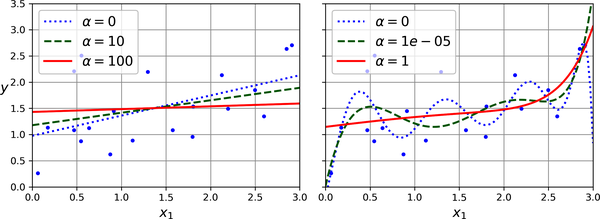

left - linear model with ridge regression,
right - polynomial model with ridge regression

## L2 Norm Example

This example demonstrates the L2 norm (Euclidean norm) calculation used in Ridge Regression, specifically for a weight vector.

**L2 Norm Definition**

The L2 norm of a vector **w** = [w₁, w₂, ..., wₙ] is:

||**w**||₂ = √(w₁² + w₂² + ... + wₙ²)

In Ridge Regression, we use the squared L2 norm (||**w**||₂²).

**Example Weight Vector**

Let **w** = [2, -3]

**Calculation:**

1.  **Square components:**
    *   w₁² = 2² = 4
    *   w₂² = (-3)² = 9

2.  **Sum squares:**
    *   4 + 9 = 13

3.  **L2 Norm:**
    *   ||**w**||₂ = √13 ≈ 3.61

4.  **Squared L2 Norm:**
    *   ||**w**||₂² = 13

**Ridge Regression Regularization Term**

The term added to the MSE in Ridge Regression is:

`(α / m) * ||w||₂²`

Let α = 0.1 and m = 100:

*   Regularization Term = (0.1 / 100) * 13 = 0.0013

**Example with different weights**

Let **w'** = [0.5, 0.1]

1.  **Square components:**
    *   w'₁² = 0.5² = 0.25
    *   w'₂² = 0.1² = 0.01

2.  **Sum squares:**
    *   0.25 + 0.01 = 0.26

3.  **Squared L2 Norm:**
    *   ||**w'**||₂² = 0.26

With α = 0.1 and m = 100:

* Regularization Term (for w') = (0.1 / 100) * 0.26 = 0.00026

**Key Takeaways**

*   The L2 norm (||**w**||₂) measures the magnitude of the weight vector **w**.
*   We use squared L2 norm (||**w**||₂²) in Ridge Regression.
*   Ridge Regression penalizes large weights via the regularization term `(α / m) * ||w||₂²`
*   The example shows that the model favors weights with smaller norm.

## Lasso Regression: Feature Selection via L1 Regularization

Lasso (Least Absolute Shrinkage and Selection Operator) Regression is another form of regularized linear regression, designed to prevent overfitting by adding a constraint to the model. Like Ridge Regression, it adds a regularization term to the cost function, but it uses the L1 norm of the weight vector instead of the square of the L2 norm.

**Key Idea:** Lasso aims to both fit the training data well and simplify the model by reducing the number of features.

**Lasso Cost Function**

The cost function for Lasso Regression is:

`J(θ) = MSE(θ) + 2α * ||w||₁`

*   `MSE(θ)` is the Mean Squared Error, measuring the difference between the model's predictions and the actual values.
*   `||w||₁` represents the L1 norm of the weight vector **w** (sum of absolute values of weights, excluding the bias term θ₀).
*  `α` (alpha) is the hyperparameter controlling the strength of the regularization term.
*  The term is multiplied by `2α`, to ensure that the optimal `α` is independent of the training set size.

**Feature Selection in Action**

*   **Weight Elimination:** A key characteristic of Lasso is that it can push the weights of less important features to *exactly zero*.  This means that those features are essentially removed from the model since they have no impact on the prediction.
*   **Automatic Selection:** Lasso automatically performs feature selection. This leads to a simpler model with fewer features and can be easier to interpret and potentially faster to make predictions. This is known as a sparse model.

**Example with Polynomial Regression:**

Imagine we are using a polynomial regression with a large degree (like 10). With enough data, a regular polynomial regression could have high variance, since the model will try to fit every single data point and noise in the data.
*  Using Lasso: If we use lasso in this same scenario, Lasso will push the weights corresponding to high-degree polynomial features to zero, resulting in an effectively lower-degree model. This is what's shown in figure 4-18. The higher the alpha value, the more features are eliminated.
 * For example, if after training we have a polynomial regression that is effectively 2nd degree, then all the weights of the features of the polynomial that have degree 3 or greater will be zero.

**Subgradients and Optimization**

*   **The Challenge:** The Lasso cost function isn't differentiable at points where θᵢ = 0 because of the absolute value in the L1 norm.
*   **Subgradients:** To overcome this, Lasso uses subgradients during gradient descent. A subgradient is a generalization of the derivative to non-differentiable functions.
*   **Subgradient Equation:** The subgradient vector *g* for the Lasso cost function is given by:

   `g(θ, J) = ∇θ MSE(θ) + 2α * sign(θ)`

   where

   `sign(θ) = -1  if θ < 0, 0 if θ = 0, +1 if θ > 0`

*  **Practical Impact**: When the weight is different than 0, the subgradient equals the derivative. When the weight is zero, the subgradient can be any value between -1 and 1. When we use gradient descent, we use these subgradients to perform updates to our weights.

**Example**
Let's say we have two features. After computing gradient for the cost function, the gradient with respect to those features is
`∂J/∂θ₁ = MSE_Gradient₁ + 2α*sign(θ₁)`
`∂J/∂θ₂ = MSE_Gradient₂ + 2α*sign(θ₂)`

Where `MSE_Gradientᵢ` is the part of the gradient that comes from the MSE of the cost function.
If `θ₁ = 0` then `sign(θ₁)` could be anything between -1 and 1. If `θ₁ = 0.5` then `sign(θ₁)= 1`. If `θ₁ = -0.2`, then `sign(θ₁)= -1`.

**Key Differences From Ridge Regression:**

*   **Regularization Norm:** Lasso uses the L1 norm, while Ridge uses the square of the L2 norm.
*   **Feature Selection:** Lasso performs automatic feature selection by setting the weights of some features to exactly zero, while Ridge just makes weights smaller.

**In Short**

Lasso Regression is a powerful regularized linear model that helps prevent overfitting while simplifying the model by automatically selecting the most important features.

## Elastic Net Regression
Elastic net regression is a middle ground between ridge regression and lasso regression. The regularization term is a weighted sum of both ridge and lasso’s regularization terms, and you can control the mix ratio r. When r = 0, elastic net is equivalent to ridge regression, and when r = 1, it is equivalent to lasso regression

***Equation 4-12. Elastic net cost function***

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mrow>
    <mi>J</mi>
    <mo>(</mo>
    <mi mathvariant="bold">&#x3B8;</mi>
    <mo>)</mo>
  </mrow>
  <mo>=</mo>
  <mrow>
    <mtext>MSE</mtext>
    <mo>(</mo>
    <mi mathvariant="bold">&#x3B8;</mi>
    <mo>)</mo>
  </mrow>
  <mo>+</mo>
  <mi>r</mi>
  <mfenced>
    <mrow>
      <mn>2</mn>
      <mi>&#x3B1;</mi>
      <munderover>
        <mo>&#x2211;</mo>
        <mrow>
          <mi>i</mi>
          <mo>=</mo>
          <mn>1</mn>
        </mrow>
        <mi>n</mi>
      </munderover>
      <mfenced open="" close="|">
        <msub>
          <mi>&#x3B8;</mi>
          <mi>i</mi>
        </msub>
      </mfenced>
    </mrow>
  </mfenced>
  <mo>+</mo>
  <mo>(</mo>
  <mn>1</mn>
  <mo>-</mo>
  <mi>r</mi>
  <mo>)</mo>
  <mfenced>
    <mrow>
      <mfrac>
        <mi>&#x3B1;</mi>
        <mi>m</mi>
      </mfrac>
      <munderover>
        <mo>&#x2211;</mo>
        <mrow>
          <mi>i</mi>
          <mo>=</mo>
          <mn>1</mn>
        </mrow>
        <mi>n</mi>
      </munderover>
      <msubsup>
        <mi>&#x3B8;</mi>
        <mi>i</mi>
        <mn>2</mn>
      </msubsup>
    </mrow>
  </mfenced>
</math>

So when should you use elastic net regression, or ridge, lasso, or plain linear regression (i.e., without any regularization)? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain linear regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer lasso or elastic net because they tend to reduce the useless features’ weights down to zero, as discussed earlier. In general, elastic net is preferred over lasso because lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

## Early Stopping

A very different way to regularize iterative learning algorithms such as gradient descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. Figure 4-20 shows a complex model (in this case, a high-degree polynomial regression model) being trained with batch gradient descent on the quadratic dataset we used earlier. As the epochs go by, the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while, though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch”.

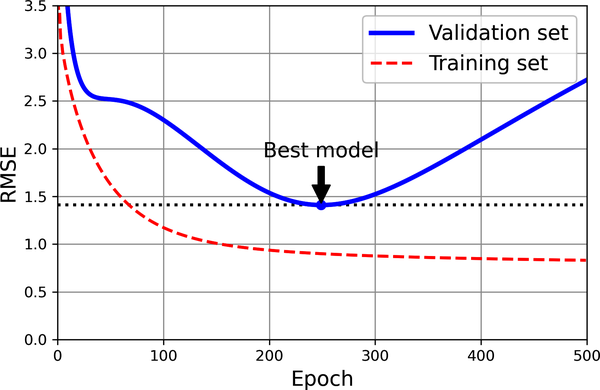

In [54]:
x.shape, y.shape

((100, 1), (100, 1))

In [55]:
from copy import deepcopy
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2)
preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')


for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train.ravel())
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

In [56]:
best_valid_rmse

0.5064720734875673

## Concise Explanation: `partial_fit` in the Code

This section focuses specifically on the role and function of the `partial_fit` method in the provided Python code.

**What `partial_fit` Does:**

*   **Incremental Learning:** The `partial_fit` method enables *incremental* or *online* learning, which means the model is trained with one or more batches of data, at a time.
*   **One Gradient Step:** Each call to `partial_fit` performs *one single gradient descent step* using the data provided. It does not perform the whole training using all the available data.
*  **No Convergence Guarantee:** The model is not guaranteed to reach a minimum of the error function after one `partial_fit()` call. Many calls are needed before convergence.
*  **Data Handling:** The `partial_fit` receives `X_train_prep` (the training data) and `y_train.ravel()` (the labels).

**Why `partial_fit` is Used Here:**

*   **SGD Support:** The `SGDRegressor` model uses an online learning algorithm, and it requires `partial_fit` to perform the gradient updates.
*   **Simulating Mini-Batch Training**: The provided code calls `partial_fit` inside of a loop, which has the effect of training the model using multiple batches of data.
*   **Large Dataset Handling:** Even though all the training dataset is sent at the same time to `partial_fit`, the idea is that in a real scenario with a large dataset, each `partial_fit` step will only see a subset of the total dataset.

**Key Takeaways:**

*   `partial_fit` is called repeatedly in the training loop to incrementally update the model.
*   Each call to `partial_fit` performs one stochastic gradient descent step.
*   It enables out-of-core or online learning where data doesn't have to fit in memory.
*   It does *not* ensure a fully trained model in one call. Multiple calls are needed to allow a model to learn from all of the dataset.

## Logistic Regression: Classification with Probabilities

Logistic Regression is a popular algorithm used for *classification* tasks, particularly binary classification. Unlike linear regression, which predicts continuous values, logistic regression predicts the probability that a given instance belongs to a particular class.

**Key Idea:** Logistic regression estimates the probability of an instance belonging to a class and then makes a prediction based on a threshold (often 50%).

**Estimating Probabilities**

1.  **Weighted Sum:** Similar to linear regression, logistic regression computes a weighted sum of input features plus a bias term.
2.  **Logistic Function:** Instead of directly outputting this sum, it passes it through the *logistic function* (also called the sigmoid function).

*   **Equation 4-13. Estimated probability (vectorized form):**

    `ŷ = h(x) = σ(θᵀx)`

    *  `x` is the instance's feature vector.
    *  `θ` is the model's parameter vector (weights and bias).
    *  `θᵀx` is the weighted sum of features plus the bias.
    *  `σ` is the logistic function.

*   **Equation 4-14. Logistic function:**

    `σ(t) = 1 / (1 + exp(-t))`

    *   `t` is the weighted sum.
    *   The logistic function outputs a value between 0 and 1, which can be interpreted as a probability.
3.  **Prediction:** Based on a threshold.
   *    **Equation 4-15. Model prediction using 50% threshold probability**
    *  If the estimated probability `ŷ` is ≥ 0.5 the predicted class is 1 (positive class).
    * If the estimated probability `ŷ` is < 0.5 the predicted class is 0 (negative class)

**Example:**

Let's say you are trying to classify emails as either spam (class 1) or not spam (class 0). Logistic regression computes a weighted sum of features (e.g., number of words, number of capital letters, number of links, etc.), transforms this weighted sum using the logistic function, and then outputs a probability. If the probability is greater than or equal to 50%, the email is predicted to be spam, otherwise it's not.

**Training and the Cost Function**

*   **Goal:** During training, logistic regression tries to find the optimal weights (θ) that lead to high probabilities for positive instances (y=1) and low probabilities for negative instances (y=0).
*   **Cost Function (Log Loss):** The *cost function* measures how well the model is performing, and it is what the model wants to minimize:
   *    **Equation 4-16. Cost function for a single training instance**
        *  If the correct class is 1, the cost is `-log(p̂)` where p̂ is the probability predicted by the model for a single data point.
         * If the correct class is 0, the cost is `-log(1 - p̂)` where p̂ is the probability predicted by the model for a single data point.
    *    The equation above implies that if the probability predicted for the correct class is very low, then the cost will be high. Similarly, if the probability is high, the cost will be low.
   *   **Equation 4-17. Log Loss cost function for all training set**:

       `J(θ) = -1/m * Σ [y⁽ⁱ⁾log(ŷ⁽ⁱ⁾) + (1-y⁽ⁱ⁾)log(1-ŷ⁽ⁱ⁾)]`
        *  Where `m` is the number of training examples, `y⁽ⁱ⁾` is the correct label of the training instance, and `ŷ⁽ⁱ⁾` is the probability that the model predicted for that instance.
* **Optimization:**
     *  This cost function is convex, so gradient descent or other optimization methods are guaranteed to find the global minimum (with some conditions).
     * **Equation 4-18. Partial derivatives of the logistic cost function:** To perform gradient descent, we need to compute the partial derivatives of this cost function with respect to each parameter θj (where j is any feature). This is the equation that the model will use to compute the gradient to update its weights using a learning rate.

       `∂J(θ)/∂θⱼ = 1/m * Σ [σ(θᵀx⁽ⁱ⁾) - y⁽ⁱ⁾] * xⱼ⁽ⁱ⁾`

     *     The gradient will be calculated for every feature `xⱼ`, and for each training example `x⁽ⁱ⁾`. Once we compute these gradients, we can perform a gradient descent step.

**Key takeaways:**

*   **Probability Estimates:** Logistic regression outputs probabilities, which helps us to understand the certainty of its prediction.
*   **Binary Classification:** It predicts between two classes (0 or 1).
*   **Convex Cost Function:** The cost function is convex, making optimization efficient.
*    **Training:** To train the model we use gradient descent using the gradients shown in equation 4-18

**Decision Boundaries (Next Step)**

(The next part of the text discusses how logistic regression creates a decision boundary based on the estimated probabilities.)

In [57]:
## Lets Build a Logit Regression using Iris Dataset

from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [58]:
iris.data, iris.target

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

In [59]:
X = iris.data
y = iris.target

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [62]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

c:\Users\deepakreddy\Documents\python_programs\ml\MachineLearning\.mlenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [64]:
X_new = np.linspace(0, 3, 1000).reshape(250, 4)
X_new.shape

(250, 4)

In [65]:
y_proba = log_reg.predict_proba(X_new)
decision_boundry = X_new[y_proba[:, 1]>=0.5]
decision_boundry

c:\Users\deepakreddy\Documents\python_programs\ml\MachineLearning\.mlenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([], shape=(0, 4), dtype=float64)

In [67]:
y_proba

array([[9.99394738e-01, 6.05261483e-04, 4.87183460e-10],
       [9.99378461e-01, 6.21538288e-04, 5.27547911e-10],
       [9.99361747e-01, 6.38252533e-04, 5.71256414e-10],
       [9.99344583e-01, 6.55415958e-04, 6.18585984e-10],
       [9.99326959e-01, 6.73040618e-04, 6.69836581e-10],
       [9.99308860e-01, 6.91138892e-04, 7.25333007e-10],
       [9.99290276e-01, 7.09723489e-04, 7.85426969e-10],
       [9.99271192e-01, 7.28807457e-04, 8.50499300e-10],
       [9.99251595e-01, 7.48404196e-04, 9.20962377e-10],
       [9.99231472e-01, 7.68527461e-04, 9.97262728e-10],
       [9.99210808e-01, 7.89191379e-04, 1.07988386e-09],
       [9.99189588e-01, 8.10410450e-04, 1.16934934e-09],
       [9.99167799e-01, 8.32199566e-04, 1.26622606e-09],
       [9.99145425e-01, 8.54574014e-04, 1.37112790e-09],
       [9.99122449e-01, 8.77549491e-04, 1.48471955e-09],
       [9.99098856e-01, 9.01142114e-04, 1.60772075e-09],
       [9.99074630e-01, 9.25368429e-04, 1.74091085e-09],
       [9.99049753e-01, 9.50245

In [66]:
y_proba > 0.5 # gives the prob for each class

#Just like the other linear models, logistic regression models can be regularized using ℓ1 or ℓ2 penalties. 
# Scikit-Learn actually adds an ℓ2 penalty by default.

array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ T

## Softmax Regression: Multi-Class Classification

Softmax Regression, also known as Multinomial Logistic Regression, is a generalization of Logistic Regression that can directly handle multiple classes, without needing to train multiple binary classifiers.

**Key Idea:** Softmax regression assigns a probability to each class and predicts the class with the highest probability.

**1. Scoring and Probability Estimation:**

*   **Scores for Each Class:** For a given instance *x*, Softmax Regression computes a score *sₖ(x)* for each class *k*. The score is calculated similarly to linear regression, as shown in **Equation 4-19:**

    `sₖ(x) = (θ⁽ᵏ⁾)ᵀ x`

    *   *x* is the instance's feature vector.
    *   *θ⁽ᵏ⁾* is the parameter vector (weights and bias) specific to class *k*. All of these vectors are typically stored as rows in a parameter matrix Θ.
    *   *(θ⁽ᵏ⁾)ᵀ x* is the weighted sum of features plus a bias, similar to linear regression.

*   **Softmax Function:** The scores are then passed through the *softmax function* (also called normalized exponential) to get a probability for each class. The function is shown in **Equation 4-20:**

    `p̂ₖ = σ(s(x))ₖ = exp(sₖ(x)) /  Σⱼ exp(sⱼ(x))`

    *   *p̂ₖ* is the estimated probability that the instance *x* belongs to class *k*.
    *   *s(x)* is the vector containing scores for all classes.
    *   The function computes the exponential of each score and normalizes it, resulting in a probability for each class.
   * The scores can also be called logits or log-odds.

**2. Prediction:**

*   **Equation 4-21. Softmax prediction:** The predicted class is the one with the highest estimated probability (highest score):

    `ŷ = argmaxₖ σ(s(x))ₖ = argmaxₖ sₖ(x) = argmaxₖ  (θ⁽ᵏ⁾)ᵀ x`

    *   `argmaxₖ` is an operator that returns the value of `k` that maximizes the term, which represents the predicted class.

**Example:**

Imagine classifying images of fruits into three categories: apples, bananas, and oranges. Softmax regression will calculate a score for each fruit, and then output the probabilities of each fruit being in the image. The fruit with the highest probability is the predicted fruit.

**3. Training and Cost Function:**

*   **Objective:** To have a model that assigns a high probability to the correct class.
*   **Cross-Entropy Cost Function:**  The *cross-entropy cost function* is used to measure how well the model is doing, and is what the model tries to minimize. It's defined in **Equation 4-22:**
     `J(Θ) = -1/m * Σᵢ Σₖ yₖ⁽ⁱ⁾ log(p̂ₖ⁽ⁱ⁾)`
    *   *m* is the number of training instances.
    *   *K* is the number of classes.
    *   *yₖ⁽ⁱ⁾* is the target probability of the *i*th instance belonging to class *k* (usually 1 if it belongs and 0 if it doesn't).
    *   *p̂ₖ⁽ⁱ⁾* is the model's estimated probability of the *i*th instance belonging to class *k*.
*   **Interpretation:** The cross-entropy penalizes the model if it predicts a low probability for the correct class.
*   **Two Classes:** When the number of classes is two, this cost function is the same as the one used in logistic regression.
*   **No Closed-Form Solution:** There's no direct equation to find the weights (θ) that minimize the cost function directly. We use gradient descent or other optimization algorithm to find the minimum.

**4. Cross Entropy Explanation**
* **Information theory**: Cross entropy is a measure from information theory.
 * **Concept**: If we want to send information about the weather every day, we need 3 bits since there are 8 options for the weather. But if we know that usually it's sunny, then we can use 1 bit for "sunny" and use more bits for other options. The cross entropy is the average number of bits that we actually send per option.
 * **Cross entropy, entropy and KL divergence**: If we are right about the assumption, then the cross entropy is equivalent to the entropy of the weather itself (the intrinsic unpredictability of the weather), but if our assumption is not true, then the cross entropy will be larger. The difference is called the Kullback–Leibler (KL) divergence.
* **Definition**: The cross entropy is defined as H(p,q) = –Σx p(x) log q(x).

**Tip:**

*   Softmax Regression is a *multiclass* classifier (one output at a time), not a multioutput classifier, meaning that it can only predict one class at a time. This means it's suitable for mutually exclusive classes (like plant species) but not for recognizing multiple objects in an image.

**Summary:**

*   **Multi-class Extension:** Softmax regression extends logistic regression to handle more than two classes.
*   **Probability Output:** It outputs a probability distribution over all classes, indicating how likely each class is.
*   **Cross-Entropy Cost:** It uses the cross-entropy cost function, which is minimized using gradient descent.
*   **Mutually Exclusive Classes:** It works best for classification problems where each instance belongs to only one of the available classes.

## The gradient vector of this cost function with regard to θ(k)

Equation 4-23. Cross entropy gradient vector for class k

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mrow>
    <msub>
      <mi>&#x2207;</mi>
      <msup>
        <mi mathvariant="bold">&#x3B8;</mi>
        <mrow>
          <mo>(</mo>
          <mi>k</mi>
          <mo>)</mo>
        </mrow>
      </msup>
    </msub>
    <mspace width="0.166667em"></mspace>
    <mi>J</mi>
    <mrow>
      <mo>(</mo>
      <mi mathvariant="bold">&#x398;</mi>
      <mo>)</mo>
    </mrow>
    <mo>=</mo>
    <mstyle scriptlevel="0" displaystyle="true">
      <mfrac>
        <mn>1</mn>
        <mi>m</mi>
      </mfrac>
    </mstyle>
    <munderover>
      <mo>&#x2211;</mo>
      <mrow>
        <mi>i</mi>
        <mo>=</mo>
        <mn>1</mn>
      </mrow>
      <mi>m</mi>
    </munderover>
    <mrow>
      <mfenced separators="" open="" close=")">
        <msubsup>
          <mover accent="true">
            <mi>p</mi>
            <mo>^</mo>
          </mover>
          <mi>k</mi>
          <mrow>
            <mo>(</mo>
            <mi>i</mi>
            <mo>)</mo>
          </mrow>
        </msubsup>
        <mo>-</mo>
        <msubsup>
          <mi>y</mi>
          <mi>k</mi>
          <mrow>
            <mo>(</mo>
            <mi>i</mi>
            <mo>)</mo>
          </mrow>
        </msubsup>
      </mfenced>
      <msup>
        <mi mathvariant="bold">x</mi>
        <mrow>
          <mo>(</mo>
          <mi>i</mi>
          <mo>)</mo>
        </mrow>
      </msup>
    </mrow>
  </mrow>
</math>


Now you can compute the gradient vector for every class, then use gradient descent (or any other optimization algorithm) to find the parameter matrix Θ that minimizes the cost function.

Let’s use softmax regression to classify the iris plants into all three classes. Scikit-Learn’s LogisticRegression classifier uses softmax regression automatically when you train it on more than two classes (assuming you use solver="lbfgs", which is the default). It also applies ℓ2 regularization by default, which you can control using the hyperparameter C, as mentioned earlier:

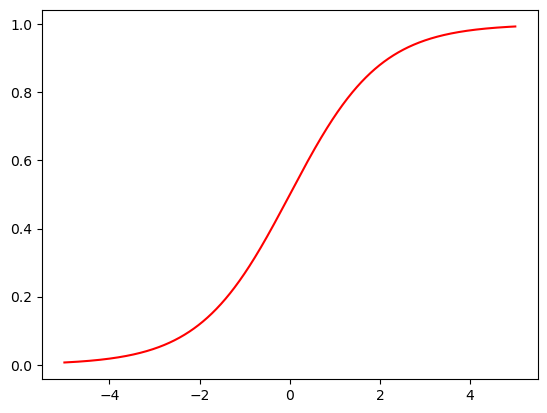

In [71]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, 1/(1+np.exp(-x)), 'r-') ## sigmoid function

C:\Users\deepakreddy\AppData\Local\Temp\ipykernel_31424\3022448089.py:2: RuntimeWarning: invalid value encountered in log
  plt.plot(x, np.log(x))


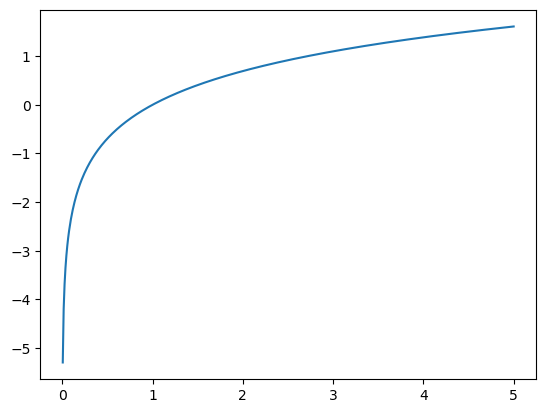

In [72]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, np.log(x))

In [97]:
X_train, y_train

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 29                 4.7               3.2                1.6               0.2
 129                7.2               3.0                5.8               1.6
 103                6.3               2.9                5.6               1.8
 23                 5.1               3.3                1.7               0.5
 54                 6.5               2.8                4.6               1.5
 ..                 ...               ...                ...               ...
 72                 6.3               2.5                4.9               1.5
 144                6.7               3.3                5.7               2.5
 39                 5.1               3.4                1.5               0.2
 12                 4.8               3.0                1.4               0.1
 11                 4.8               3.4                1.6               0.2
 
 [120 rows x 4 columns],
 29     0
 129    2
 103 

In [99]:
from sklearn.linear_model import LogisticRegression

softmax_reg = LogisticRegression(C=20, random_state=42) #uses softmax reg if classes are more than 2
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=20, random_state=42)

In this chapter, you learned various ways to train linear models, both for regression and for classification. You used a closed-form equation to solve linear regression, as well as gradient descent, and you learned how various penalties can be added to the cost function during training to regularize the model. Along the way, you also learned how to plot learning curves and analyze them, and how to implement early stopping. Finally, you learned how logistic regression and softmax regression work. We’ve opened up the first machine learning black boxes! In the next chapters we will open many more, starting with support vector machines.

## Excersices

1. Which linear regression training algorithm can you use if you have a training set with millions of features?

- SGD, Mini Batch GD, BATCH GD because Closed Form Equation and SVD will compute the weights in the single Step and complexity is n^3 and n^2 respectively 

2. Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?

- SGD will suffer the most following Mini Batch and Batch GD because if the scale of values are different the Trajectory Will Flutuavate difficult in reaching the Global Minimum

3. Can gradient descent get stuck in a local minimum when training a logistic regression model?

- The cost function in logistic regression is convex, which means there's only one global minimum, and gradient descent will converge to it, it will not get stuck in local minimum.

4. Do all gradient descent algorithms lead to the same model, provided you let them run long enough?

- Yes except SGD rest all GD Variants will reach to the Same Model provided them to run long enough, however the SGD will reach the Minima with Not so Optimal Values because of its Fultuavated Trajectory Path

5. Suppose you use batch gradient descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

- High learning rates cause the algorithm to overshoot the minimum, leading to divergence and increasing errors.

Fixes:

**Reduce the learning rate**

**Use learning rate scheduling or adaptive learning methods.**

***Check for data preprocessing issues.***

6. Is it a good idea to stop mini-batch gradient descent immediately when the validation error goes up?

- No, don't stop immediately. Mini-batch GD has noisy updates; monitor the validation error trend over multiple epochs. Use early stopping with patience: stop only if the validation error hasn't improved for a set number of epochs. Rollback to best.

7. Which gradient descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?


- Speed: Mini-batch GD is fastest to reach the vicinity of the optimal solution.

**Convergence:**

- Batch GD converges to the global minimum (if tuned correctly).

- Mini-batch GD converges to a near-optimal solution.

- SGD oscillates around the minimum.

**Improving Convergence:**

- Batch GD: Use a smaller learning rate and learning rate decay.

- SGD: Use learning rate decay, momentum.

- Both SGD and mini-batch GD: Use adaptive learning rate methods (Adam, RMSprop).

8. Suppose you are using polynomial regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

- Overly Complex Model: The polynomial degree is too high, allowing the model to memorize noise instead of learning the underlying patterns.

- Memorizing Noise: The model fits the training data too closely, including random fluctuations, leading to poor generalization.

- Poor Generalization: The model performs well on training data but poorly on unseen data (high variance/overfitting).

9. Suppose you are using ridge regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

- Cause: The model is too simple to capture the underlying patterns in the data.

Solution (Ridge Regression):

Reduce α: Decrease the regularization hyperparameter (α) to allow the model to be more complex and better fit the training data.

General Approach:

Increase model complexity: In addition to decreasing regularization. Pick a more complex model, then add regularization to it.

Essentially, the model is too simple, so you need to increase its complexity while being mindful of the bias/variance trade-off, and you can do that by decreasing alpha.

10. Why would you want to use:

Ridge regression instead of plain linear regression (i.e., without any regularization)?

Lasso instead of ridge regression?

Elastic net instead of lasso regression?

- Ridge: To prevent overfitting by reducing magnitude of weights.

- Lasso: For feature selection (sparsity) by driving less important feature parameters to 0.

- Elastic Net: To combine the benefits of both ridge and lasso, and to handle multicollinearity and datasets where number of features are greater than number of samples better than Lasso.

11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two logistic regression classifiers or one softmax regression classifier?

- For the image classification problem (outdoor/indoor AND daytime/nighttime), use two separate logistic regression classifiers, because you have two independent binary classification tasks. Softmax regression is not appropriate because the labels are not mutually exclusive

12. Implement batch gradient descent with early stopping for softmax regression without using Scikit-Learn, only NumPy. Use it on a classification task such as the iris dataset.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data 
y = iris.target

In [7]:
X.shape, y.shape

((150, 4), (150,))

In [109]:
y[:16].to_numpy().reshape(16, 1)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [112]:
theta = np.random.rand(4, 1)
theta.shape, X.shape

(X.values[0:16] @ theta - y[:16].to_numpy().reshape(16, 1)).shape, 

(16, 1)

In [118]:
120//16

7

In [131]:
X.values[y==1][0:0+16]

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4]])

In [143]:
y.unique()

array([0, 1, 2])

In [147]:
theta = np.random.rand(4, 3)
theta[:, [0]]

array([[0.37517076],
       [0.18942633],
       [0.46623724],
       [0.93088122]])

In [8]:
y_one_h = np.zeros((len(y), 3))

y_one_h[np.arange(len(y)), y] = 1

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [15]:
import numpy as np
X_train, y_train, X_test, y_test = X[:120], y[:120], X[120:], y[120:]

epochs = 10000
eta = 0.01 
m = len(X_train)
b = 0
theta = np.random.rand(4, 3)

def softmax(logits, weights, classes):
    sm_res =  np.exp(logits @ weights[:, [classes]]) / np.sum(np.exp(logits @ weights), axis=1).reshape(8, 1)
    return sm_res

def one_hot(y):
    y_one_h = np.zeros((len(y), 3))

    y_one_h[np.arange(len(y)), y] = 1

    return y_one_h

for e in range (epochs):
    for j in [0, 1, 2]:
        b = 0
        for i in range(len(y_train[y_train==j])//8):
            # Get a batch of size 8 for each class j
            X_batch = X_train[y_train == j][b:b + 8] 
            y_batch = y_train[y_train == j][b:b + 8].reshape(8, 1)
            y_batch_one_h = one_hot(y_batch)
            
            # Calculate the gradient for the current class 'j'
            # Use theta[:, [j]] to get the weights for only class j
            #gradient = 1/8 * X_batch.T @ (X_batch @ theta[:, [j]] - y_batch)
            #print(softmax(X_batch, theta, j)-y_batch_one_h[:, [j]])
            gradient = 1/8 * X_batch.T @ (softmax(X_batch, theta, j) - y_batch_one_h[:, [j]])
            # Update the weights for the current class using the gradient. 
            #theta[:, [j]] = theta[:, [j]] - (eta * gradient)

            # Move to the next batch
            b = b + 8


In [16]:
theta

array([[0.76233707, 0.13653417, 0.36203406],
       [0.74340224, 0.63274137, 0.7987169 ],
       [0.88850105, 0.07536453, 0.94246753],
       [0.68561992, 0.8371677 , 0.66883216]])

In [28]:
(X_train[y_train==0, :] @ theta).argmax(axis=1) # we got all correct

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)